In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

**Note:** This notebook can run using TensorFlow 2.5.0

In [2]:
#!pip install tensorflow==2.5.0

In [3]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
### YOUR CODE HERE
# Figure out how to import regularizers
from tensorflow.keras import regularizers
###
import tensorflow.keras.utils as ku 
import numpy as np 

In [4]:
tokenizer = Tokenizer()

# sonnets.txt
!gdown --id 108jAePKK4R3BVYBbYJZ32JWUwxeMg20K

data = open('./sonnets.txt').read()

corpus = data.lower().split("\n")


tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

# create input sequences using list of tokens
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)


# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

Downloading...
From: https://drive.google.com/uc?id=108jAePKK4R3BVYBbYJZ32JWUwxeMg20K
To: /content/sonnets.txt
100% 93.6k/93.6k [00:00<00:00, 86.6MB/s]


In [5]:
### START CODE HERE
model = Sequential()
model.add(Embedding(total_words, 100,input_length=max_sequence_len-1)) # Your Embedding Layer)
model.add(Bidirectional(LSTM(64,return_sequences=True))) # An LSTM Layer)
model.add(Dropout(0.2)) # A dropout layer)
model.add(LSTM(32)) # Another LSTM Layer)
model.add(Dense(total_words/2, activation='relu',kernel_regularizer=regularizers.l2(0.01))) # A Dense Layer including regularizers)
model.add(Dense(total_words, activation='softmax')) # A Dense Layer)
# Pick an optimizer
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) # Pick a loss function and an optimizer)
### END CODE HERE
    
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 10, 100)           321100    
                                                                 
 bidirectional (Bidirectiona  (None, 10, 128)          84480     
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 10, 128)           0         
                                                                 
 lstm_1 (LSTM)               (None, 32)                20608     
                                                                 
 dense (Dense)               (None, 1605)              52965     
                                                                 
 dense_1 (Dense)             (None, 3211)              5156866   
                                                        

In [6]:
 history = model.fit(predictors, label, epochs=100, verbose=1)

Epoch 1/100
484/484 [==============================] - 16s 9ms/step - loss: 6.8674 - accuracy: 0.0217
Epoch 2/100
484/484 [==============================] - 5s 9ms/step - loss: 6.5028 - accuracy: 0.0229
Epoch 3/100
484/484 [==============================] - 4s 9ms/step - loss: 6.3935 - accuracy: 0.0247
Epoch 4/100
484/484 [==============================] - 4s 9ms/step - loss: 6.2686 - accuracy: 0.0293
Epoch 5/100
484/484 [==============================] - 4s 9ms/step - loss: 6.1798 - accuracy: 0.0340
Epoch 6/100
484/484 [==============================] - 5s 9ms/step - loss: 6.1026 - accuracy: 0.0377
Epoch 7/100
484/484 [==============================] - 5s 10ms/step - loss: 6.0363 - accuracy: 0.0387
Epoch 8/100
484/484 [==============================] - 4s 9ms/step - loss: 5.9674 - accuracy: 0.0426
Epoch 9/100
484/484 [==============================] - 5s 9ms/step - loss: 5.8994 - accuracy: 0.0460
Epoch 10/100
484/484 [==============================] - 5s 9ms/step - loss: 5.8233 - accu

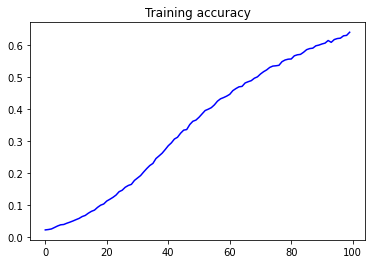

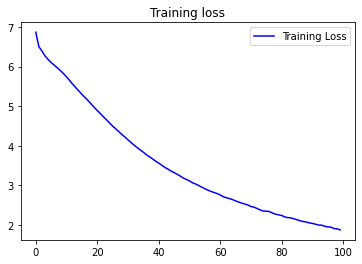

In [7]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [9]:
seed_text = "Help me Obi Wan Kenobi, you're my only hope"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = np.argmax(model.predict(token_list),axis=1)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

Help me Obi Wan Kenobi, you're my only hope of approve me heaven live heaven seen shown heaven doth men's ill did express'd remain torn clear ' best still know be free alone abused worms me doth be gone me should wrong new foes commend commend pain be new alone still now good rare alone so false behold find go new torn shown shown shown new delight eyes rare foes bell fitted fitted light light twain torn last still how live so made thee ' true bright his boat deserts asleep indigest indigest dwells untrimm'd staineth torn twain last still so twain prove thee die men seen none renew'd
